In [120]:
# autoreload .py files
%load_ext autoreload
%autoreload 2  
import utility

from utility import load_dataset,tfidf_preprocessing,keras_text_preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import tensorflow as tf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
train, test, val = load_dataset(4)

In [ ]:
from tensorflow.keras.layers import TextVectorization
max_tokens = 5000  # Maximum vocab size.
max_len = 256  # Sequence length to pad the outputs to.
batch_size = 256*2

# Create the layer.
text_vectorization = TextVectorization(
    output_mode="int", # "int" indexs , "multi_hot" ,
    max_tokens = max_tokens,  # Maximum vocab size.
    output_sequence_length=max_len,
        #"count"  Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.
    standardize = "lower_and_strip_punctuation",
        #"pad_to_max_tokens" output 
        # 
 #  (batch_size, max_len)

)
text_vectorization = TextVectorization(
    output_mode="multi_hot", # "int" indexs , "multi_hot" ,
    max_tokens = max_len,   # output  (batch_size, max_tokens)
        #"count"  Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.
    standardize = "lower_and_strip_punctuation",
   #  pad_to_max_tokens = max_len # output  (batch_size, max_tokens)

)


In [105]:

tf_train,tf_test,tf_val = keras_text_preprocessing(train,test,val,text_vectorization,batch_size)

In [106]:
text_vectorization.get_vocabulary()

['[UNK]',
 np.str_('the'),
 np.str_('of'),
 np.str_('in'),
 np.str_('and'),
 np.str_('a'),
 np.str_('to'),
 np.str_('was'),
 np.str_('is'),
 np.str_('he'),
 np.str_('as'),
 np.str_('for'),
 np.str_('on'),
 np.str_('by'),
 np.str_('with'),
 np.str_('his'),
 np.str_('at'),
 np.str_('from'),
 np.str_('it'),
 np.str_('an'),
 np.str_('that'),
 np.str_('has'),
 np.str_('also'),
 np.str_('are'),
 np.str_('which'),
 np.str_('born'),
 np.str_('she'),
 np.str_('or'),
 np.str_('first'),
 np.str_('her'),
 np.str_('who'),
 np.str_('its'),
 np.str_('one'),
 np.str_('university'),
 np.str_('after'),
 np.str_('new'),
 np.str_('been'),
 np.str_('their'),
 np.str_('be'),
 np.str_('were'),
 np.str_('american'),
 np.str_('known'),
 np.str_('two'),
 np.str_('this'),
 np.str_('but'),
 np.str_('they'),
 np.str_('where'),
 np.str_('including'),
 np.str_('had'),
 np.str_('during'),
 np.str_('most'),
 np.str_('school'),
 np.str_('have'),
 np.str_('album'),
 np.str_('other'),
 np.str_('became'),
 np.str_('united

In [ ]:
# inputs.shape: (32, 64)
# inputs.shape: (batch_size, max_len)
for inputs, targets in tf_train:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
  #  print("inputs[0]:", inputs[0])
  #  print("targets[0]:", targets[0])
    break

inputs.shape: (512, 256)
inputs.dtype: <dtype: 'int64'>
targets.shape: (512,)
targets.dtype: <dtype: 'int64'>
inputs[0]: tf.Tensor(
[1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(256,), dtype=int64)
targets[0]: tf.Tensor(0, shape=(), dtype=int64)


In [132]:

from tensorflow import keras


model = utility.get_model(max_tokens= max_len, hidden_dims=[64,32,16])
model.summary()

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Stop if validation loss stops improving
    patience=5,  # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights after stopping
)

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    "binary_1gram.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)
callbacks = [ early_stopping ,
    checkpoint_callback
]

history = model.fit(tf_train.cache(),
          validation_data=tf_val.cache(),
          epochs=50,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(tf_test)[1]:.3f}")


64
32
16


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,073 (74.50 KB)

 Trainable params: 19,073 (74.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6013 - loss: 0.6561 - val_accuracy: 0.7974 - val_loss: 0.4811
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7667 - loss: 0.5070 - val_accuracy: 0.8245 - val_loss: 0.4103
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ -2s -4820us/step - accuracy: 0.8039 - loss: 0.4474 - val_accuracy: 0.8323 - val_loss: 0.3859
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.4228 - val_accuracy: 0.8383 - val_loss: 0.3739
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8238 - loss: 0.4069 - val_accuracy: 0.8415 - val_loss: 0.3650
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3941 - val_accuracy: 0.8453 - val_loss: 0.3571
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.3844 - val_accuracy: 0.8487 - val_loss: 0.3498
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8386 - loss: 0.3757 - val_accurac

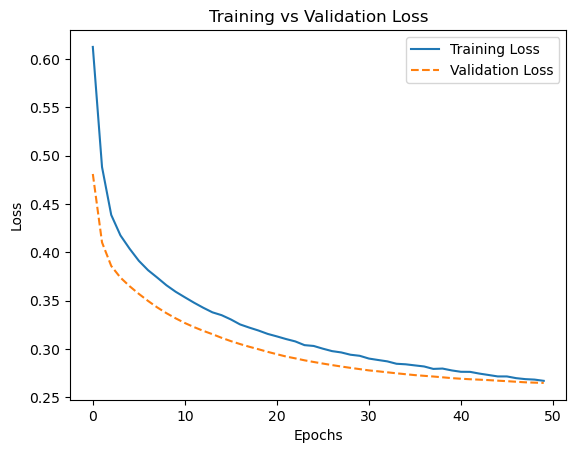

In [133]:
import matplotlib.pyplot as plt


utility.plot_losses(history)

In [150]:
history.history['loss']

[0.6126322746276855,
 0.488331139087677,
 0.4387640357017517,
 0.4175918400287628,
 0.4037412703037262,
 0.39127933979034424,
 0.3815700113773346,
 0.37390145659446716,
 0.3659636974334717,
 0.35925033688545227,
 0.35351037979125977,
 0.3479055166244507,
 0.34269657731056213,
 0.3379341661930084,
 0.33498865365982056,
 0.33058348298072815,
 0.3254285752773285,
 0.3221456706523895,
 0.3191179037094116,
 0.3156311511993408,
 0.3130336403846741,
 0.3102830946445465,
 0.3078460991382599,
 0.30399519205093384,
 0.3031423091888428,
 0.3003186285495758,
 0.29779601097106934,
 0.2964285910129547,
 0.29406431317329407,
 0.29295793175697327,
 0.2900976836681366,
 0.2886158525943756,
 0.2871949374675751,
 0.2847122550010681,
 0.2841533422470093,
 0.28301844000816345,
 0.2819206416606903,
 0.2793826162815094,
 0.27975332736968994,
 0.2778201401233673,
 0.27640339732170105,
 0.27632424235343933,
 0.27455437183380127,
 0.2731039822101593,
 0.27160635590553284,
 0.2715950608253479,
 0.269822061061859

In [149]:
metrics_test = utility.test_model(model,tf_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ -2s 2ms/step - accuracy: 0.8883 - loss: 0.2683   
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     22500
           1       0.89      0.88      0.89     22500

    accuracy                           0.89     45000
   macro avg       0.89      0.89      0.89     45000
weighted avg       0.89      0.89      0.89     45000

[[20060  2440]
 [ 2664 19836]]


In [ ]:
model.evaluate(tf_test) # [0] loss [1] accuracy

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.2683


[0.2703763246536255, 0.8865777850151062]

In [148]:
history.history["val_loss"][-1]
history.history["val_accuracy"][-1]

0.8898000121116638

In [138]:
y_test = np.concatenate([y.numpy() for _, y in tf_test]) 
y_pred_probs = model.predict(tf_test)
y_pred = (y_pred_probs > 0.5).astype(int) 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:

y_pred_probs.size

45000

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.89      0.89     22500
           1       0.89      0.88      0.89     22500

    accuracy                           0.89     45000
   macro avg       0.89      0.89      0.89     45000
weighted avg       0.89      0.89      0.89     45000

[[20060  2440]
 [ 2664 19836]]


In [82]:
16//3

5